In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# CSV 파일에서 데이터 로드
df = pd.read_csv("cover_data.csv")
print(df.head())

# 타겟과 피처 분리 (클래스를 0부터 시작하도록 조정)
X = df.drop(columns=["class"])
y = df["class"] - 1

# 데이터 분할 (train/validation/test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 모델 설계
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(7, activation='softmax')  # 7개의 cover class
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 정수형 라벨 사용
    metrics=['accuracy']
)

/opt/homebrew/Caskroom/mambaforge/base/envs/tf_metal/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-03 23:20:30.768894: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-03 23:20:30.768920: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-03 23:20:30.768925: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
I0000 00:00:1743690030.768958 11347833 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1743690030.768977 11347833 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/tas

In [4]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)

Epoch 1/20


2025-04-03 23:20:54.331215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


12710/12710 ━━━━━━━━━━━━━━━━━━━━ 102s 8ms/step - accuracy: 0.6526 - loss: 0.8867 - val_accuracy: 0.6851 - val_loss: 0.7271
Epoch 2/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 98s 8ms/step - accuracy: 0.6715 - loss: 0.7846 - val_accuracy: 0.7070 - val_loss: 0.7346
Epoch 3/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.6526 - loss: 0.8793 - val_accuracy: 0.6784 - val_loss: 0.7575
Epoch 4/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.6377 - loss: 1.0003 - val_accuracy: 0.6653 - val_loss: 0.8628
Epoch 5/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.6265 - loss: 1.1139 - val_accuracy: 0.6128 - val_loss: 1.1763
Epoch 6/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.6170 - loss: 1.2582 - val_accuracy: 0.6276 - val_loss: 1.0231
Epoch 7/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 97s 8ms/step - accuracy: 0.6132 - loss: 1.3788 - val_accuracy: 0.6528 - val_loss: 1.0633
Epoch 8/20
12710/12710 ━━━━━━━━━━━━━━━━━━━━ 96s 8ms/step - accuracy: 0.6032 - l

In [5]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

2724/2724 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6828 - loss: 2.9484
Test Accuracy: 0.6853


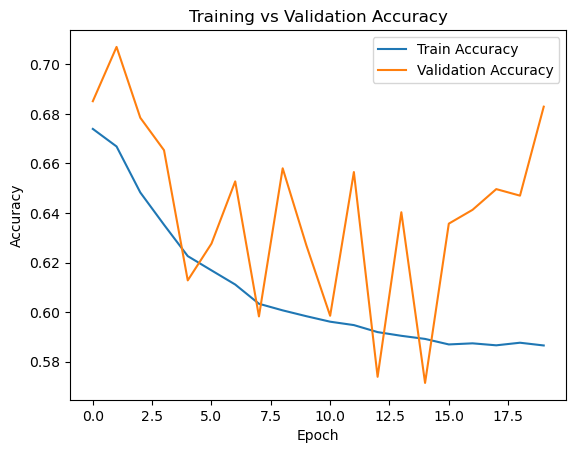

In [6]:
import matplotlib.pyplot as plt

# 정확도 시각화
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

2724/2724 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step


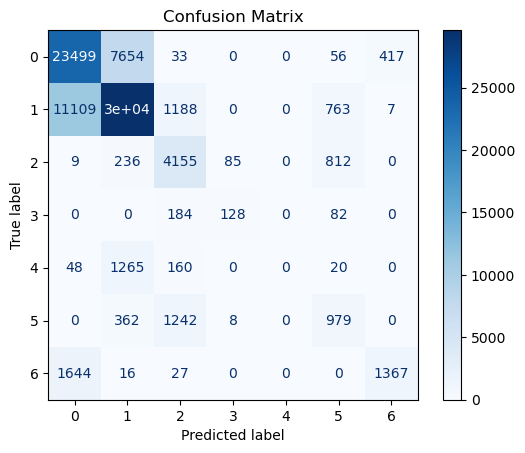

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_scaled).argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()